<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Clustering_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**<br>
This notebook aims to perform exploratory data analysis on the Breast Cancer Wisconsin (Diagnostic) dataset using scikit-learn library. The dataset is a collection of data on breast cancer tumor characteristics, such as the size, shape, and texture of the tumor, as well as patient demographic information. It contains 569 instances, each representing a tumor, and 30 features that describe the characteristics of each tumor. The target variable is the diagnosis of the tumor, which can be either malignant or benign. The dataset is commonly used to develop and test machine learning models for predicting the diagnosis of breast cancer tumors based on their characteristics.
This notebook will explore the dataset using various techniques, including data conversion, exploratory data analysis, clustering, and dimensionality reduction. The results of these analyses will provide insights into the characteristics of breast cancer tumors and their potential for predicting the diagnosis of the tumor. Additionally, potential improvements for this notebook will be suggested to enhance its effectiveness in analyzing the Breast Cancer Wisconsin (Diagnostic) dataset.<br>

**Data Loading and Conversion**<br>
The first step is to load the dataset from scikit-learn and convert it into a Pandas dataframe for easier manipulation.<br>

**Exploratory Data Analysis**<br>
Some exploratory data analysis will be performed on the dataset. This will include printing the dimensions of the dataset, the number of null values, and summary statistics. Additionally, the distribution of the features will be visualized using histograms.<br>

**Clustering**<br>
The optimal number of clusters will be determined using the elbow method and silhouette score. Then, KMeans and Hierarchical clustering algorithms will be applied to the dataset with the optimal number of clusters. The predicted clusters will be added to the original dataframe and visualized using the matplotlib library.<br>

**Dimensionality Reduction**<br>
PCA will be applied to the dataset to perform dimensionality reduction. Then, the KMeans and Hierarchical clustering algorithms will be applied to the reduced dataset. The results will be compared using the silhouette_score.

**Conclusion**<br>
This notebook provides a step-by-step guide for exploring and clustering the Breast Cancer Wisconsin (Diagnostic) dataset. The results can be used for further analysis and interpretation to gain insights about the data.<br>

**Proposed Improvements**<br>
The following improvements can be made to this notebook:<br>
*   Adding more detailed explanations about the dataset and its features.
Using interactive visualizations to make it easier to explore and understand the data.<br>
*   Comparing the performance of different clustering algorithms to determine the best one for this dataset.
Providing more insights and interpretations about the results obtained from clustering the data.




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_breast_cancer

In [ ]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

#EDA

###Print the dimensions of the dataset

In [ ]:
df.shape

(569, 30)

###Head of the data

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###Print the number of null values in the dataset

In [ ]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


###Description of the DataSet

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualize the distribution of the features

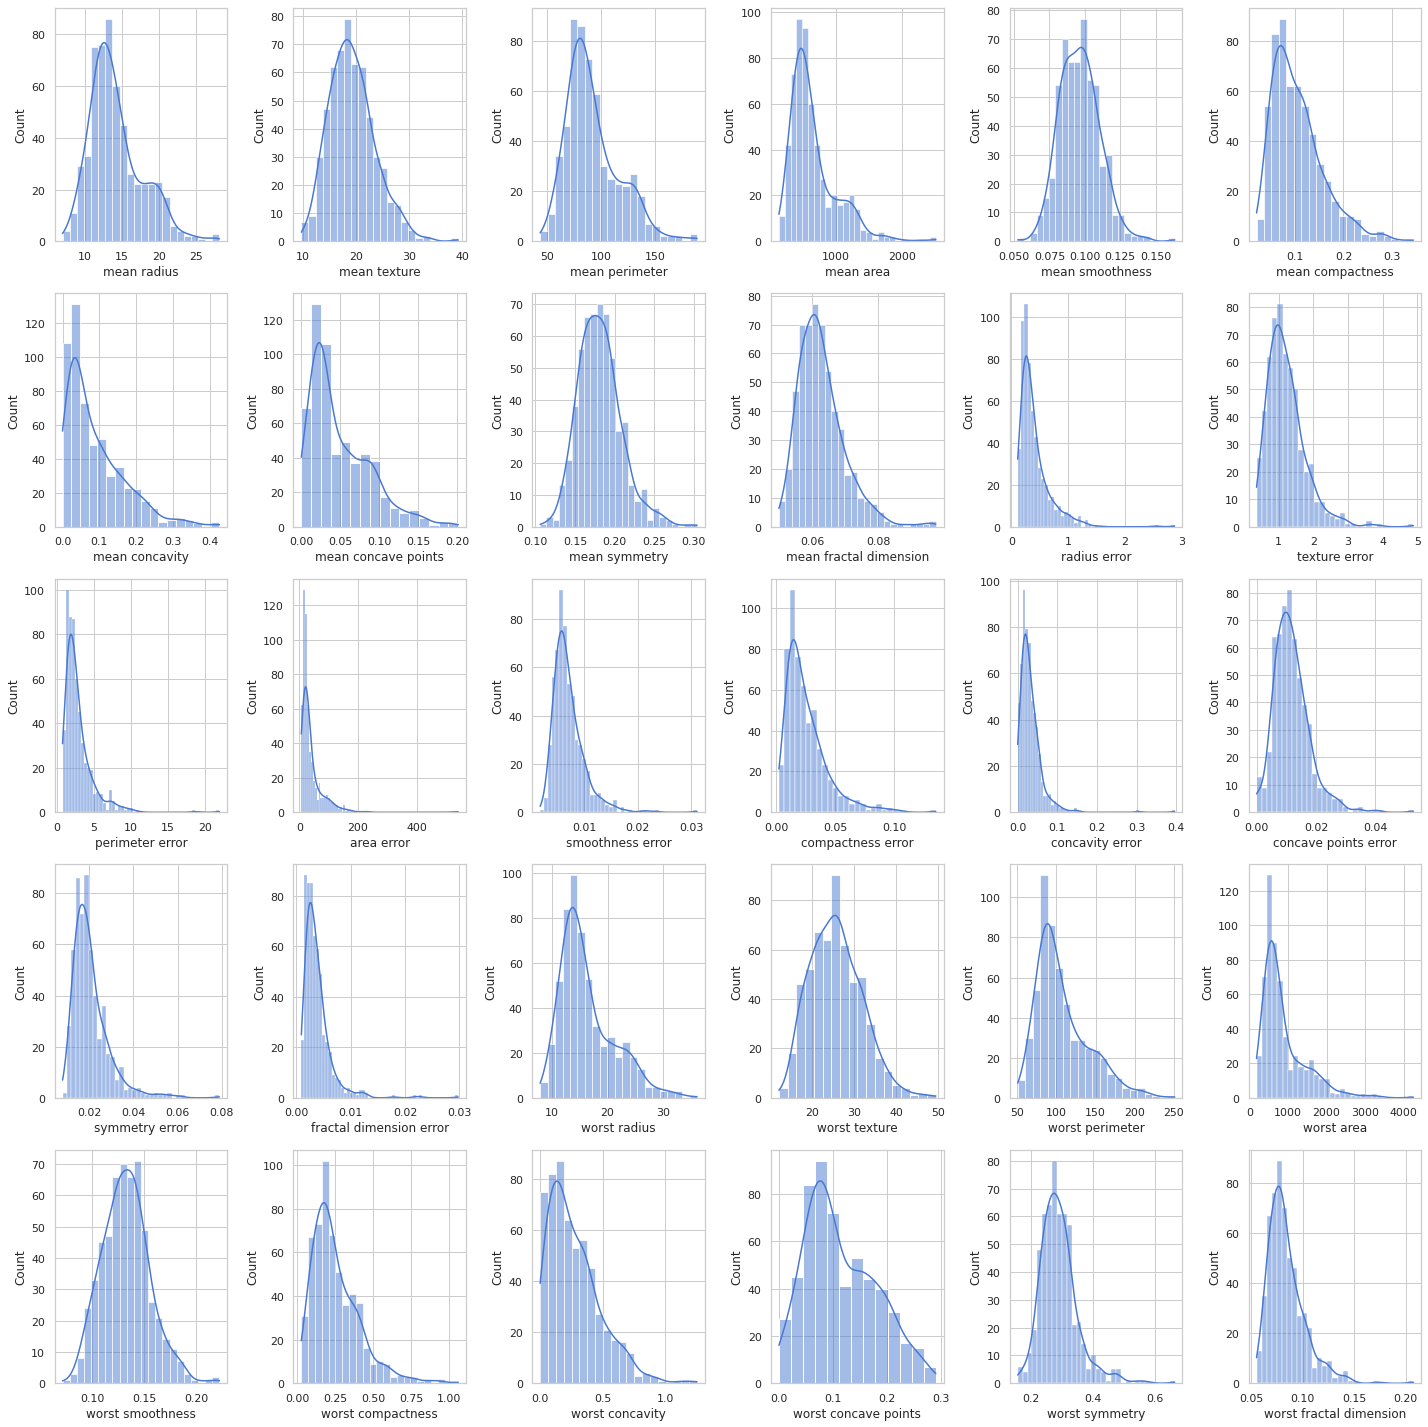

In [ ]:
sns.set(style='whitegrid', palette='muted')
fig, axes = plt.subplots(5, 6, figsize=(20, 20))
axes = axes.ravel()
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
plt.tight_layout()

### Standardize the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Determine the optimal number of clusters using the elbow method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

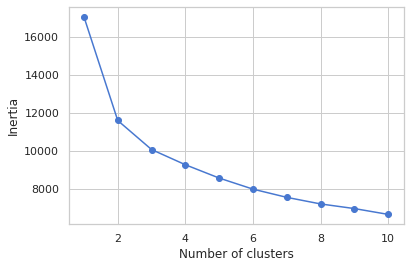

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Determine the optimal number of clusters using the silhouette score

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

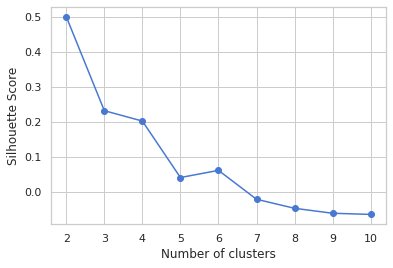

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## K-means clustering without reduction method

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42) #Instance of Kmeans class of Scikitlearn
kmeans_labels = kmeans.fit_predict(X_scaled)#Train the kmeans
kmeans_score = silhouette_score(X_scaled, kmeans_labels)#Silhouette Score of Kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


####Kmeans Score without reduction method



In [ ]:
kmeans_score

0.3449740051034408

### Hierarchical clustering without reduction method

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_score = silhouette_score(X_scaled, hierarchical_labels)

###Hierarchical clustering Score without reduction method

In [ ]:
hierarchical_score

0.33938477753669855

### Plot the results for both

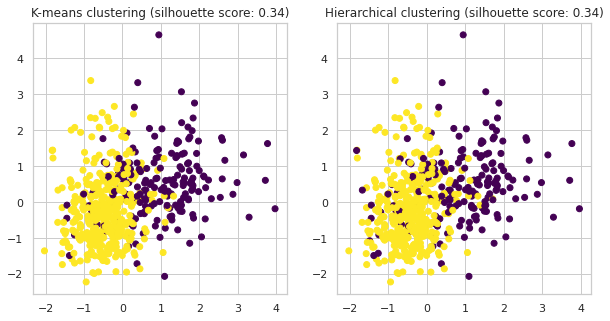

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-means clustering (silhouette score: {kmeans_score:.2f})')

axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical clustering (silhouette score: {hierarchical_score:.2f})')
plt.show()

#Reduction Method (PCA)

In [ ]:
PCA

sklearn.decomposition._pca.PCA

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### K-means clustering with PCA

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_score = silhouette_score(X_pca, kmeans_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_score

0.5084690190672078

### Hierarchical clustering with PCA

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_pca)
hierarchical_score = silhouette_score(X_pca, hierarchical_labels)

In [ ]:
hierarchical_score

0.5046397728338795

### Plot the results with PCA

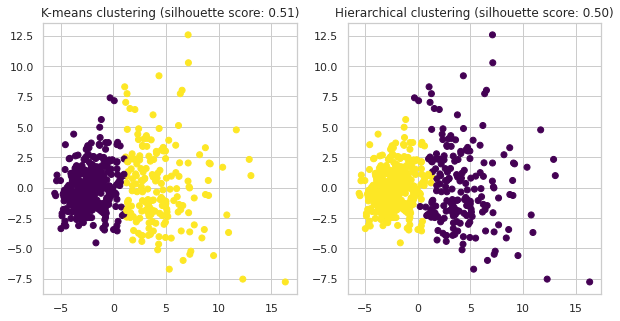

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-means clustering (silhouette score: {kmeans_score:.2f})')

axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical clustering (silhouette score: {hierarchical_score:.2f})')
plt.show()

#Conclusion

In this project, we applied two different clustering techniques, K-means and hierarchical clustering, to the Breast Cancer Wisconsin (Diagnostic) Dataset. We also used principal component analysis (PCA) to reduce the dimensionality of the dataset and compare the performance of the clustering algorithms with and without PCA.

After applying K-means and hierarchical clustering with and without PCA, we evaluated the results using the silhouette score. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, with values ranging from -1 to 1. A score closer to 1 indicates a better clustering.

The silhouette scores obtained for K-means and hierarchical clustering were 0.344 and 0.339 without PCA, and 0.508 and 0.504 with PCA, respectively. These results suggest that hierarchical clustering performs slightly better than K-means for this dataset, and that using PCA to reduce the dimensionality of the dataset can improve the performance of both clustering algorithms.

Overall, the results of this project suggest that hierarchical clustering is a better choice than K-means for this dataset, and that dimensionality reduction techniques such as PCA can be used to improve the performance of clustering algorithms. It is important to note, however, that the choice of clustering algorithm and parameters may depend on the specific goals of the analysis and the characteristics of the dataset, and further exploration may be needed to identify the best approach.